In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
data = pd.read_csv("3stage1.csv")

In [3]:
data

,Line,Square,Ring,Star
0,0.60801,1.22704,0.60193,0.61181
1,0.60861,1.21246,0.60621,0.61782
2,0.60511,1.22195,0.60332,0.62690
3,0.61150,1.22413,0.61041,0.60805
4,0.61004,1.22865,0.61151,0.56856
...,...,...,...,...
70,0.00450,0.06486,0.01855,0.00000
71,0.00309,0.06032,0.01733,0.00000
72,0.00286,0.05652,0.01699,0.00000
73,0.00286,0.05525,0.01382,0.00000


In [4]:

line = np.array(data.Line)
Square = np.array(data.Square)
Ring = np.array(data.Ring)
Star = np.array(data.Star)
x=np.arange(0, len(line))

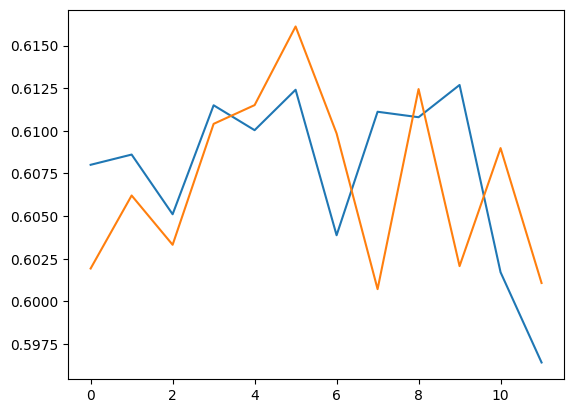

In [5]:
plt.plot(line[:len(line)//6])
plt.plot(Ring[:len(line)//6])

In [6]:
def simple_moving_average(data, window_size):
    smoothed_data = []
    for i in range(len(data)):
        if i < window_size // 2 or i >= len(data) - window_size // 2:
            # Do not smooth the values at the edges of the range
            smoothed_data.append(data[i])
        else:
            # Calculate the moving average for the values within the range
            total = sum(data[i - window_size // 2:i + window_size // 2 + 1])
            smoothed_value = total / window_size
            smoothed_data.append(smoothed_value)
    return smoothed_data

In [7]:
cleaning_range = line[:len(line)//6]

In [8]:
window_size = 3

In [9]:
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

x_data = x[len(x)//6:]
y_data =  line[len(line)//6:]

In [10]:
params, covariance = curve_fit(exponential_func, x[len(x)//6:], line[len(line)//6:])
a_fit, b_fit, c_fit = params

In [11]:
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = exponential_func(x_fit, a_fit, b_fit, c_fit)

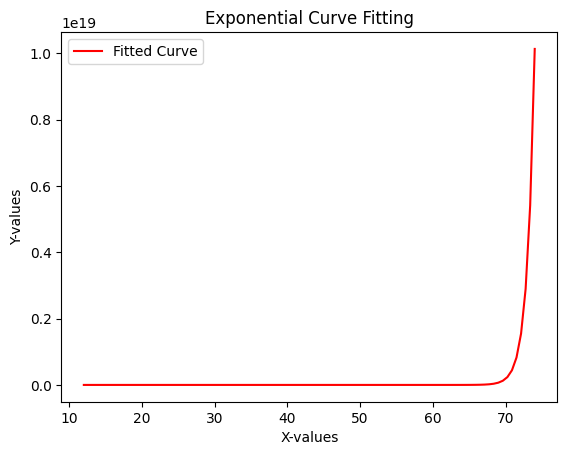

In [12]:
#plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.legend()
plt.title('Exponential Curve Fitting')
plt.show()

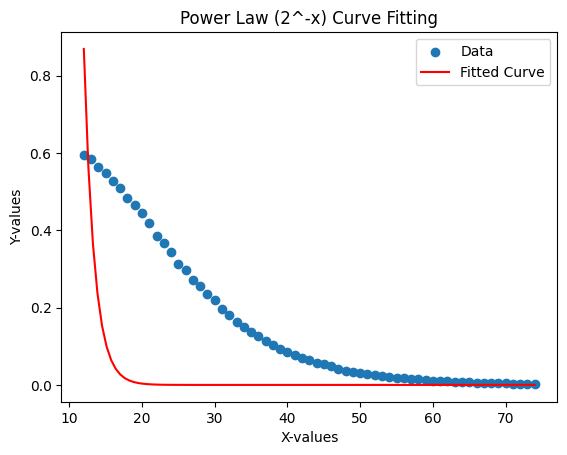

Fitted Parameter (a): 3561.427532383158


In [13]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the power-law function to fit
def power_law_func(x, a):
    return a * 2**(-x)

# Your data
x_data = x[len(x)//6:]  # Replace with your x-values
y_data = line[len(x)//6:]

# Fit the power-law function to the data
params, covariance = curve_fit(power_law_func, x_data, y_data)

# Extract the fitted parameter
a_fit = params[0]

# Generate fitted data points for visualization
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = power_law_func(x_fit, a_fit)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.legend()
plt.title('Power Law (2^-x) Curve Fitting')
plt.show()

# Print the fitted parameter
print(f"Fitted Parameter (a): {a_fit}")


In [14]:
print(y_data)

[0.59385 0.58432 0.56511 0.54924 0.52768 0.5098  0.48407 0.46465 0.44606
 0.4179  0.38618 0.36749 0.34492 0.31404 0.29824 0.27116 0.25516 0.2348
 0.21945 0.19686 0.18045 0.16394 0.14949 0.13767 0.12745 0.11293 0.10373
 0.09319 0.08423 0.07686 0.06939 0.06325 0.05714 0.05514 0.0483  0.04185
 0.03727 0.03458 0.0317  0.02804 0.0265  0.0232  0.01972 0.01838 0.01781
 0.01609 0.01465 0.01297 0.01084 0.01038 0.00917 0.00835 0.00675 0.00643
 0.00598 0.00518 0.0048  0.00531 0.0045  0.00309 0.00286 0.00286 0.00295]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


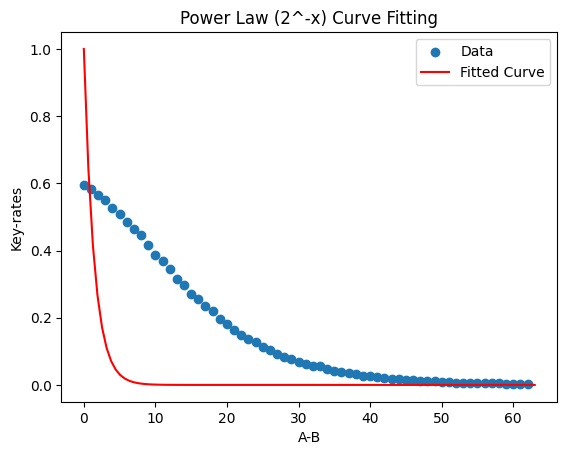

Fitted Parameter (a): 1.0


In [15]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the power-law function to fit
def power_law_func(x, a):
    return 2**(-x)

# Your data
x_data = np.arange(len(y_data))  # Generate x-values as integers
y_data = np.array([
    0.59385, 0.58432, 0.56511, 0.54924, 0.52768, 0.5098,  0.48407, 0.46465, 0.44606,
    0.4179,  0.38618, 0.36749, 0.34492, 0.31404, 0.29824, 0.27116, 0.25516, 0.2348,
    0.21945, 0.19686, 0.18045, 0.16394, 0.14949, 0.13767, 0.12745, 0.11293, 0.10373,
    0.09319, 0.08423, 0.07686, 0.06939, 0.06325, 0.05714, 0.05514, 0.0483,  0.04185,
    0.03727, 0.03458, 0.0317,  0.02804, 0.0265,  0.0232,  0.01972, 0.01838, 0.01781,
    0.01609, 0.01465, 0.01297, 0.01084, 0.01038, 0.00917, 0.00835, 0.00675, 0.00643,
    0.00598, 0.00518, 0.0048,  0.00531, 0.0045,  0.00309, 0.00286, 0.00286, 0.00295
])  # Replace with your y-values

# Fit the power-law function to the data
params, covariance = curve_fit(power_law_func, x_data, y_data)

# Extract the fitted parameter
a_fit = params[0]

# Generate fitted data points for visualization
x_fit = np.linspace(0, len(x_data), 100)
y_fit = power_law_func(x_fit, a_fit)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
plt.xlabel('A-B')
plt.ylabel('Key-rates')
plt.legend()
plt.title('Power Law (2^-x) Curve Fitting')
plt.show()

# Print the fitted parameter
print(f"Fitted Parameter (a): {a_fit}")


[10.74133565 -0.16031781]


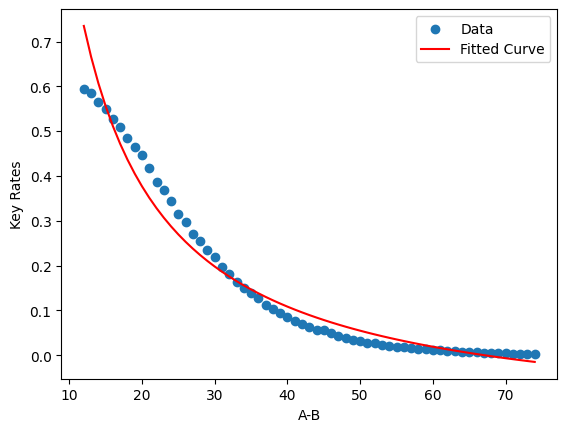

Fitted Parameters (a, b): 10.741335651433635, -0.16031780918430363


In [16]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the model function as y = 1/x
def inverse_function(x, a, b):
    return a / x+b

# Your data
x_data = x[len(x)//6:]  # Generate x-values as integers starting from 1
y_data = line[len(line)//6:]

# Fit the model function to the data
params, covariance = curve_fit(inverse_function, x_data, y_data)
print(params)

# Extract the fitted parameters
a_fit, b_fit = params

# Generate fitted data points for visualization
x_fit = x_data
y_fit = inverse_function(x_fit, a_fit, b_fit)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
plt.xlabel('A-B')
plt.ylabel('Key Rates')
plt.legend()
#plt.title('Fitting y = 1/x')
plt.show()

# Print the fitted parameters
print(f"Fitted Parameters (a, b): {a_fit}, {b_fit}")


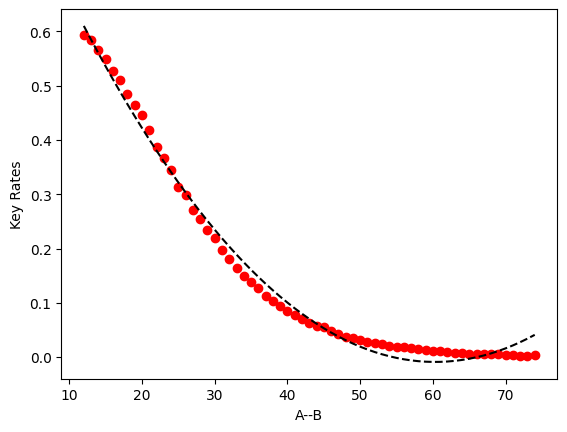

In [17]:
a,b,c = np.polyfit(x[len(x)//6:], line[len(x)//6:],2)
plt.scatter(x[len(x)//6:], line[len(x)//6:], c='r')
plt.plot(x[len(x)//6:], a*x[len(x)//6:]**2+b*x[len(x)//6:]+c, ls='--', c='k')
plt.xlabel('A--B')
plt.ylabel('Key Rates')
plt.show()

Dataset 1: Fitted Parameters (L, k, x0): (0.655629006403353, -0.13861582561594737, 25.299287574491057)
Dataset 2: Fitted Parameters (L, k, x0): (0.6096119579372482, -0.5441700643115146, 18.677506398492024)


/var/folders/sy/t_db6zn943qgnmq60lgt6fsw0000gn/T/ipykernel_1475/826789196.py:12: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0)))


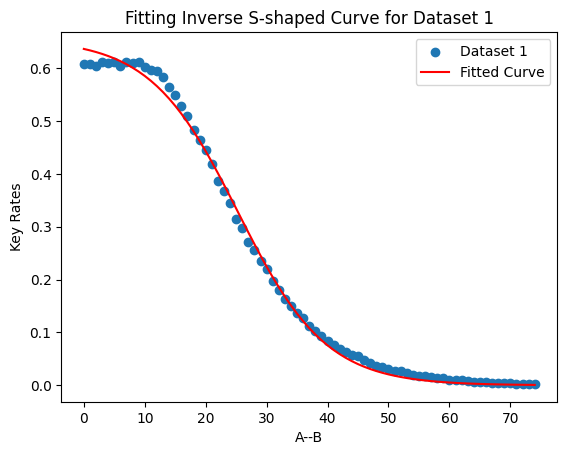

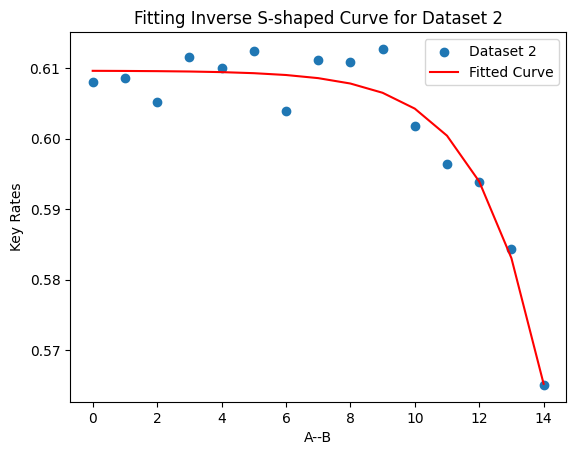

TypeError: curveS() missing 1 required positional argument: 'x0'

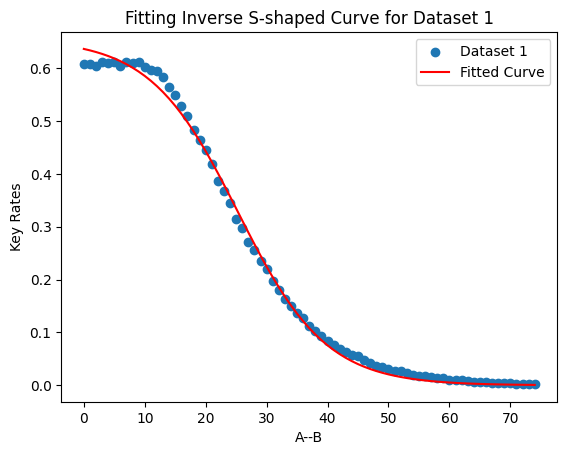

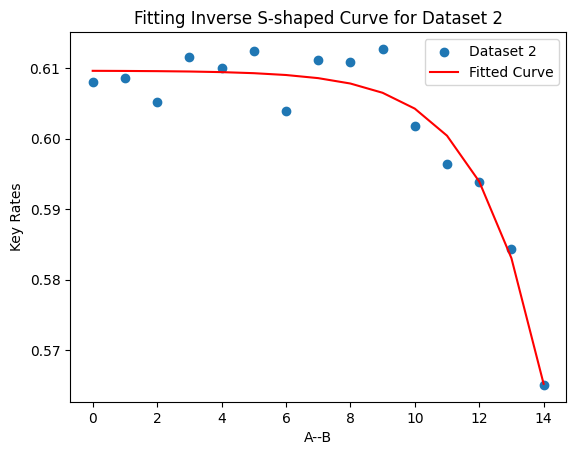

In [18]:
def curveS(x, L, k, x0):
    """
    Parameters:
    - x: Input data (independent variable).
    - L: Maximum value of the curve (upper asymptote).
    - k: Steepness of the curve.
    - x0: x-value of the sigmoid's midpoint.

    Returns:
    - Fitted curve values.
    """
    return L / (1 + np.exp(-k * (x - x0)))

def fitcurveS(x_data, y_data):
    """
    Fit an inverse S-shaped curve to the provided data.

    Parameters:
    - x_data: Input data (independent variable).
    - y_data: Output data (dependent variable).

    Returns:
    - Fitted parameters: L, k, x0.
    """
    #initial_guess = [max(y_data), 1, np.median(x_data)]  # Initial parameter guess

    # Use curve_fit to find the best-fitting parameters
    fitted_params_list = []

    for i, (x_data, y_data) in enumerate(zip(x_data_list, y_data_list)):
        initial_guess = [max(y_data), 1, np.median(x_data)]  # Initial parameter guess

        # Use curve_fit to find the best-fitting parameters
        fitted_params, _ = curve_fit(curveS, x_data, y_data, p0=initial_guess)
        
        fitted_params_list.append(tuple(fitted_params))
        
        # Generate the fitted curve
        fitted_curve = curveS(x_data, *fitted_params)

        # Plot the original data and the fitted curve
        plt.figure()
        plt.scatter(x_data, y_data, label=f'Dataset {i+1}')
        plt.plot(x_data, fitted_curve, label='Fitted Curve', color='red')
        plt.legend()
        plt.xlabel('A--B')
        plt.ylabel('Key Rates')
        plt.title(f'Fitting Inverse S-shaped Curve for Dataset {i+1}')

    return fitted_params_list


# Sample data
x_data1 = x
y_data1 = line

x_data2=x[:len(x)//5]
y_data2 = line[:len(line)//5]
x_data_list = [x_data1, x_data2]
y_data_list = [y_data1, y_data2]
fitted_params_list = fitcurveS([x_data1], [y_data1])

# Print the fitted parameters for each dataset
for i, params in enumerate(fitted_params_list):
    print(f"Dataset {i+1}: Fitted Parameters (L, k, x0): {params}")

# Show all the plots
plt.show()


# Fit the inverse S-shaped curve
fitted_params = fitcurveS(x_data, y_data)

# Generate the fitted curve
fitted_curve = curveS(x_data, *fitted_params)

# Plot the original data and the fitted curve
plt.show()

print("Fitted Parameters (L, k, x0):", fitted_params)


In [ ]:
plt.plot(x_data)

In [19]:
a,b = np.polyfit(x[:len(x)//6], line[:len(x)//6],1)

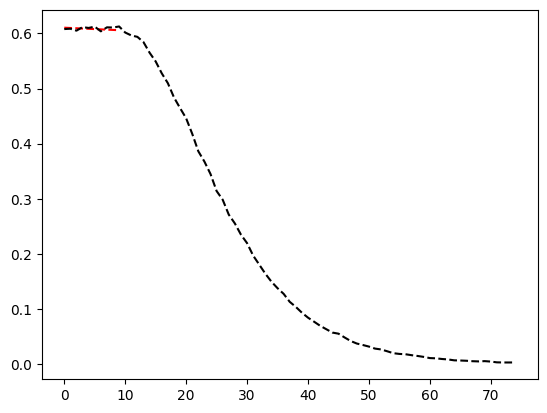

In [25]:
plt.plot(x[:len(x)//7], a*x[:len(x)//7]+b, c='r', ls='--')
plt.plot(x, line, c='k', ls='--')

In [26]:
print(line[:len(x)//6])

[0.60801 0.60861 0.60511 0.6115  0.61004 0.61241 0.60388 0.61112 0.6108
 0.61269 0.60171 0.59642]


Fitted Parameters (L, k, x0) for Dataset 1: [ 0.65562901 -0.13861583 25.29928757]


/var/folders/sy/t_db6zn943qgnmq60lgt6fsw0000gn/T/ipykernel_1475/2011208081.py:16: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0)))


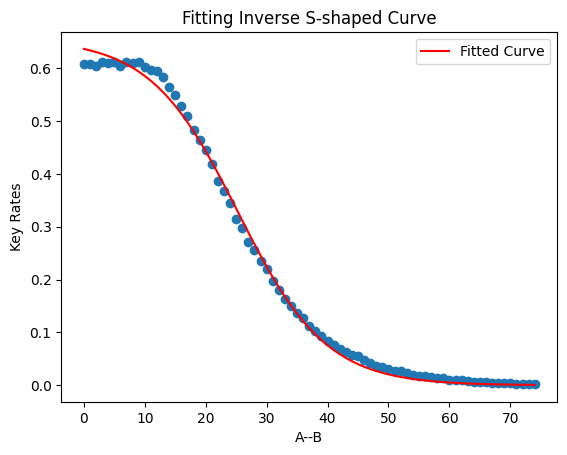

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def curveS(x, L, k, x0):
    """
    Parameters:
    - x: Input data (independent variable).
    - L: Maximum value of the curve (upper asymptote).
    - k: Steepness of the curve.
    - x0: x-value of the sigmoid's midpoint.

    Returns:
    - Fitted curve values.
    """
    return L / (1 + np.exp(-k * (x - x0)))

def fitcurveS(x_data, y_data):
    """
    Fit an inverse S-shaped curve to the provided data.

    Parameters:
    - x_data: Input data (independent variable).
    - y_data: Output data (dependent variable).

    Returns:
    - Fitted parameters: L, k, x0.
    """
    initial_guess = [max(y_data), 1, np.median(x_data)]  # Initial parameter guess

    # Use curve_fit to find the best-fitting parameters
    fitted_params, _ = curve_fit(curveS, x_data, y_data, p0=initial_guess)

    # Generate the fitted curve
    fitted_curve = curveS(x_data, *fitted_params)

    # Plot the original data and the fitted curve
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, fitted_curve, label='Fitted Curve', color='red')
    plt.legend()
    plt.xlabel('A--B')
    plt.ylabel('Key Rates')
    plt.title('Fitting Inverse S-shaped Curve')

    return fitted_params



In [79]:
def turning(arr, tolerance):

    newarr=[]
    count=[]
    for i in range(len(arr)-1):
        a1=arr[i]
        a2=arr[i+1]
        diff = a1-a2
        
        if np.round(diff,2)!=0:
            count.append(diff)
        newarr.append(diff)
    return newarr, count

39
[0.60801 0.60861 0.60511 0.6115  0.61004 0.61241 0.60388 0.61112 0.6108
 0.61269 0.60171 0.59642]
12


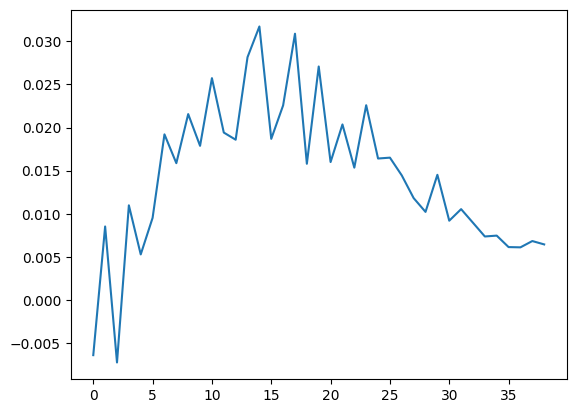

In [83]:
arr,m = turning(line, 1e-1)
print(len(m))
print(line[:len(line)//6])
print(len(line)//6)

plt.plot(m)

In [ ]:
# Sample data for one dataset
x_data1 = x
y_data1 = line

# Fit the inverse S-shaped curve for one dataset
fitted_params1 = fitcurveS(x_data1, y_data1)

# Print the fitted parameters for the dataset
print("Fitted Parameters (L, k, x0) for Dataset 1:", fitted_params1)

# Show the plot for the dataset
plt.axvline(0)
plt.show()


In [85]:
threshold = 0.001  # Define a threshold for detecting the dip
dip_index = np.argmax(np.diff(line) < -threshold)  # Find the index of the first significant decrease

# Print the index and corresponding value
print("Index where the dip starts:", dip_index)
print("Value at the dip:", line[dip_index])

Index where the dip starts: 1
Value at the dip: 0.60861


Index where the dip starts: 7
Value at the dip: 0.609391515151517


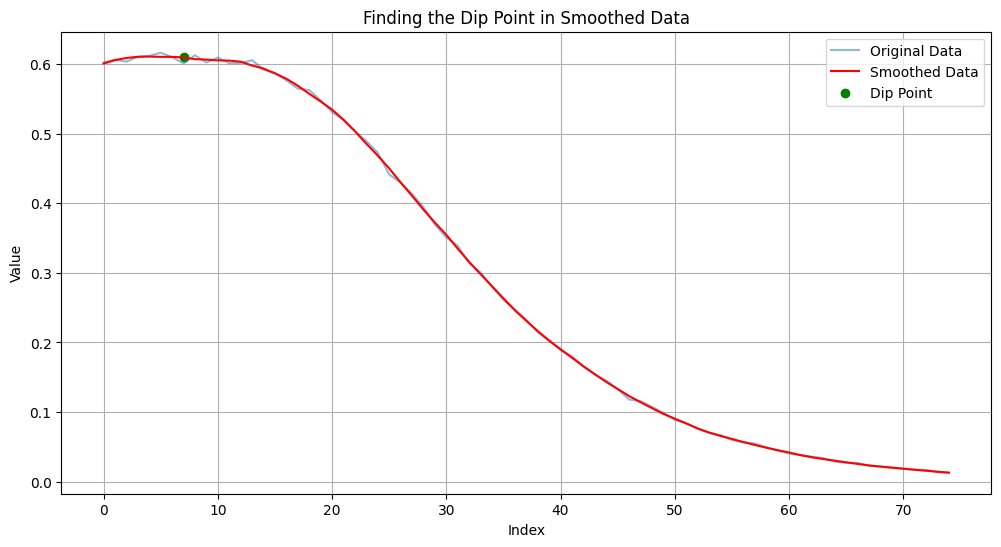

In [89]:


# Input data
data = [
    0.60801, 0.60861, 0.60511, 0.6115, 0.61004, 0.61241, 0.60388, 0.61112, 0.6108,
    0.61269, 0.60171, 0.59642, 0.59385, 0.58432, 0.56511, 0.54924, 0.52768, 0.5098,
    0.48407, 0.46465, 0.44606, 0.4179, 0.38618, 0.36749, 0.34492, 0.31404, 0.29824,
    0.27116, 0.25516, 0.23480, 0.21945, 0.19686, 0.18045, 0.16394, 0.14949, 0.13767,
    0.12745, 0.11293, 0.10373, 0.09319, 0.08423, 0.07686, 0.06939, 0.06325, 0.05714,
    0.05514, 0.04830, 0.04185, 0.03727, 0.03458, 0.03170, 0.02804, 0.02650, 0.02320,
    0.01972, 0.01838, 0.01781, 0.01609, 0.01465, 0.01297, 0.01084, 0.01038, 0.00917,
    0.00835, 0.00675, 0.00643, 0.00598, 0.00518, 0.00480, 0.00531, 0.00450, 0.00309,
    0.00286, 0.00286, 0.00295
]

# Convert the data to a numpy array
data = np.array(Ring)

# Apply a smoothing filter (Savitzky-Golay filter) to reduce noise
smoothed_data = savgol_filter(data, window_length=11, polyorder=3)

# Find the index where the smoothed data starts to dip down
threshold = -0.0005  # Adjust this threshold as needed
dip_index = np.where(np.diff(smoothed_data) < threshold)[0][0] + 1  # Adding 1 to account for the diff operation

# Plot the original data, smoothed data, and the detected dip point
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data', alpha=0.5)
plt.plot(smoothed_data, label='Smoothed Data', color='red')
plt.scatter(dip_index, smoothed_data[dip_index], color='green', label='Dip Point')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Finding the Dip Point in Smoothed Data')
plt.legend()
plt.grid(True)

# Print the index and corresponding value
print("Index where the dip starts:", dip_index)
print("Value at the dip:", smoothed_data[dip_index])

# Show the plot
plt.show()


Index of the transition point: 0
Value at the transition point: 0.6084216083916083


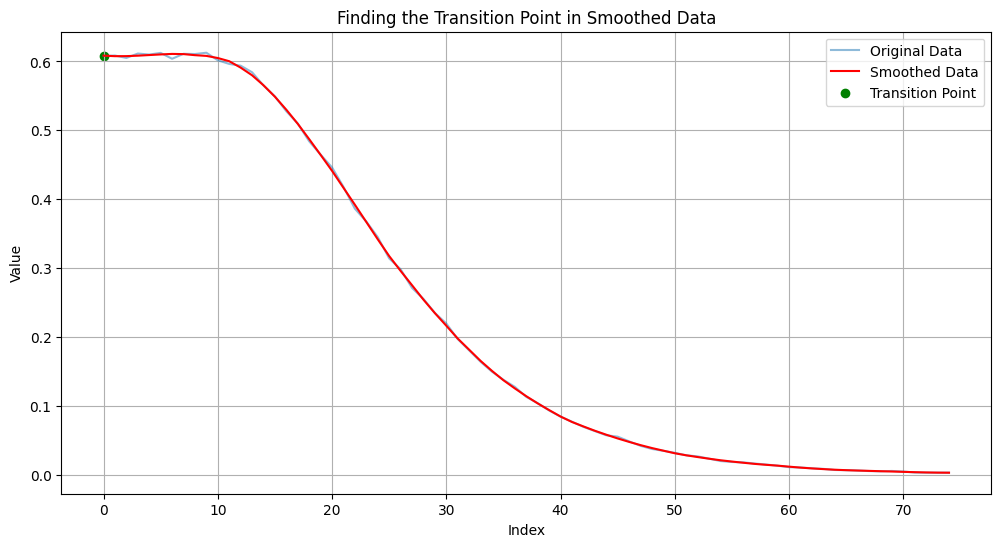

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Input data
data = [
    0.60801, 0.60861, 0.60511, 0.6115, 0.61004, 0.61241, 0.60388, 0.61112, 0.6108,
    0.61269, 0.60171, 0.59642, 0.59385, 0.58432, 0.56511, 0.54924, 0.52768, 0.5098,
    0.48407, 0.46465, 0.44606, 0.4179, 0.38618, 0.36749, 0.34492, 0.31404, 0.29824,
    0.27116, 0.25516, 0.23480, 0.21945, 0.19686, 0.18045, 0.16394, 0.14949, 0.13767,
    0.12745, 0.11293, 0.10373, 0.09319, 0.08423, 0.07686, 0.06939, 0.06325, 0.05714,
    0.05514, 0.04830, 0.04185, 0.03727, 0.03458, 0.03170, 0.02804, 0.02650, 0.02320,
    0.01972, 0.01838, 0.01781, 0.01609, 0.01465, 0.01297, 0.01084, 0.01038, 0.00917,
    0.00835, 0.00675, 0.00643, 0.00598, 0.00518, 0.00480, 0.00531, 0.00450, 0.00309,
    0.00286, 0.00286, 0.00295
]

# Convert the data to a numpy array
data = np.array(data)

# Apply a smoothing filter (Savitzky-Golay filter) to reduce noise
smoothed_data = savgol_filter(data, window_length=11, polyorder=3)

# Calculate the first derivative of the smoothed data
derivative = np.diff(smoothed_data)

# Find the index where the derivative becomes significantly negative (indicating the transition)
threshold = -0.000001  # Adjust this threshold as needed
transition_index = np.where(derivative < threshold)[0][0]  # Adding 1 to account for the diff operation

# Plot the original data, smoothed data, and the detected transition point
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Data', alpha=0.5)
plt.plot(smoothed_data, label='Smoothed Data', color='red')
plt.scatter(transition_index, smoothed_data[transition_index], color='green', label='Transition Point')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Finding the Transition Point in Smoothed Data')
plt.legend()
plt.grid(True)

# Print the index and corresponding value
print("Index of the transition point:", transition_index)
print("Value at the transition point:", smoothed_data[transition_index])

# Show the plot
plt.show()


Fitted Parameters (L, k, x0): [ 0.65555968 -0.13858085 25.30171284]


/var/folders/sy/t_db6zn943qgnmq60lgt6fsw0000gn/T/ipykernel_1475/73395482.py:8: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0)))


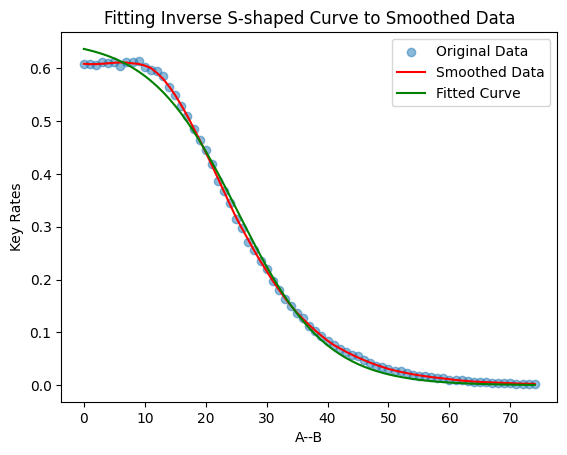

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

# Define the sigmoid function
def curveS(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

def fitcurveS(x_data, y_data, smooth_window_length=11, smooth_polyorder=3, want_plot=True):
    """
    Fit an inverse S-shaped curve to the provided data after smoothing.

    Parameters:
    - x_data: Input data (independent variable).
    - y_data: Output data (dependent variable).
    - smooth_window_length: Window length for data smoothing (Savitzky-Golay filter).
    - smooth_polyorder: Polynomial order for data smoothing.

    Returns:
    - Fitted parameters: L, k, x0.
    """

    # Apply a smoothing filter to the data
    smoothed_y_data = savgol_filter(y_data, window_length=smooth_window_length, polyorder=smooth_polyorder)

    # Initial parameter guess
    initial_guess = [max(smoothed_y_data), 1, np.median(x_data)]

    # Use curve_fit to find the best-fitting parameters for the smoothed data
    fitted_params, _ = curve_fit(curveS, x_data, smoothed_y_data, p0=initial_guess)

    # Generate the fitted curve using the original data
    fitted_curve = curveS(x_data, *fitted_params)

    # Plot the original data, smoothed data, and the fitted curve
    if want_plot==True:
        plt.figure()
        plt.scatter(x_data, y_data, label='Original Data', alpha=0.5)
        plt.plot(x_data, smoothed_y_data, label='Smoothed Data', color='red')
        plt.plot(x_data, fitted_curve, label='Fitted Curve', color='green')
        plt.legend()
        plt.xlabel('A--B')
        plt.ylabel('Key Rates')
        plt.title('Fitting Inverse S-shaped Curve to Smoothed Data')

        # Print the fitted parameters
        print("Fitted Parameters (L, k, x0):", fitted_params)

        # Show the plot
        plt.show()

    return fitted_params

# Sample data
x_data1 = x
y_data1 = line

# Fit the inverse S-shaped curve to smoothed data
fitted_params = fitcurveS(x_data1, y_data1)

# Generate the fitted curve using the original data
fitted_curve = curveS(x_data1, *fitted_params)
